![](block_diagram/p14p4.png)

A perfectly stirred tank is used to heat a flowing liquid. The process is depicted via the block diagram above. 
* $P$ is the power to the heater
* $Q$ is the heating rate of the system
* $T$ is the actual temperature in the tank
* $T_m$ is the measured temperature via a thermocouple.

The units of the time constants in the transfer functions in the above block diagram are in units of minutes.

A test has been conducted where the power (in deviation form) is varied sinusoidally:

\begin{equation}
    P^*(t)=0.5 \sin (3t).
\end{equation}

For this input to the process, the measured temperature is:

\begin{equation}
    T_m^*(t) = 3.464 \sin(3 t + \phi),
\end{equation}
where $\phi$ is some phase shift relative to the input $P^*$ that you observed but did not bother to measure.

**Q**: Find the value for the maximum error bound between $T^*$ and $T_m^*$ if the sinusoidal input has been applied for a long time.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg" width="200">

Why isn't $T_m$ just tracing $T$? Well the thermocouple has associated dynamics, remember your midterm 2 question! It takes time for the thermocouple to thermally equilibrate with the liquid in the tank. The dynamics are characterized by its transfer function.

**A**

For the sake of internalizing frequency response topics, please try to work through the problem before looking at the answer here!

👀

First, it shouldn't surprise you that $T_m^*$ exhibits the same frequency of $P^*$ despite the input being filtered through three different [LINEAR] processes (the heater, flow system, and thermocouple).

Mathematically, the problem asks for:
\begin{equation}
    \max_t | T_m^*(t)-T^*(t)|
\end{equation}

So a good start would be to find the function $T^*(t)$.

These two quantities are related to each other by the transfer function (see the block diagram):
\begin{equation}
    G(s) = \frac{1}{0.1s+1}.
\end{equation}

Ask yourself why the gain is 1. That's no coincidence.

Here $T_m$ is the output and $T$ is the input. We're given the output, and we're asked to reconstruct the input.

In class, we derived that the input and output are related as follows. For a sinusoidal input:
\begin{equation}
    T^*(t) = A \sin(\omega t + \psi),
\end{equation}

the output, after transients die off, will be:
\begin{equation}
    T_m^*(t) = A |G(i\omega)| \sin(\omega t + \psi + \angle G(i\omega)). 
\end{equation}

* output has same frequency $\omega$ as the input.
* output's amplitude is input's amplitude scaled by $|G(i\omega)|$.
* output exhibits a phase shift relative to the input, of $\angle G(i\omega)$.

... and that's for an arbitrary transfer function $G(s)$.

For first order processes
\begin{equation}
    G(s) = \frac{K}{\tau s + 1}
\end{equation}
we derived in class that:
\begin{equation}
    |G(i\omega)| = \frac{K}{\sqrt{1+ (\tau \omega)^2}}
\end{equation}
and 
\begin{equation}
    \angle G(i\omega) = \tan^{-1}(-\omega\tau)
\end{equation}

So for this problem, we can write:

\begin{equation}
    3.464 = A|G(i\omega)| = \frac{A}{\sqrt{1+[(0.1)(3.0)]^2}}
\end{equation}

and solve for the amplitude $A$ of the true temperature $T^*$.

In [36]:
τ = 0.1
ω = 3.0
A = 3.464 * sqrt(1 + (τ * ω) ^ 2)

3.6165221746866147

and the phase shift:

In [37]:
∠G = atan(-τ * ω)

-0.29145679447786715

We can now plot $T_m^*$ and $T^*$ on the same graph. We can ignore the phase shift $\phi$ since this is just a shift that occurs on both $T_m$ and $T$.
Note we *subtract* $\angle G(i\omega)$ from the argument in the $\sin()$ for $T^*(t)$ because we are reconstructing the input from the output.

In [45]:
using PyPlot
t = linspace(0, 20, 5000) # fine array of times
Tm = 3.464 * sin.(ω * t) # corresponding Tm's
T = A * sin.(ω * t - ∠G) # corresponding T's

5000-element Array{Float64,1}:
  1.0392 
  1.0807 
  1.12205
  1.16323
  1.20424
  1.24509
  1.28575
  1.32623
  1.36651
  1.4066 
  1.44649
  1.48617
  1.52563
  ⋮      
 -1.6352 
 -1.67379
 -1.71215
 -1.75026
 -1.78812
 -1.82572
 -1.86306
 -1.90013
 -1.93692
 -1.97344
 -2.00967
 -2.04561

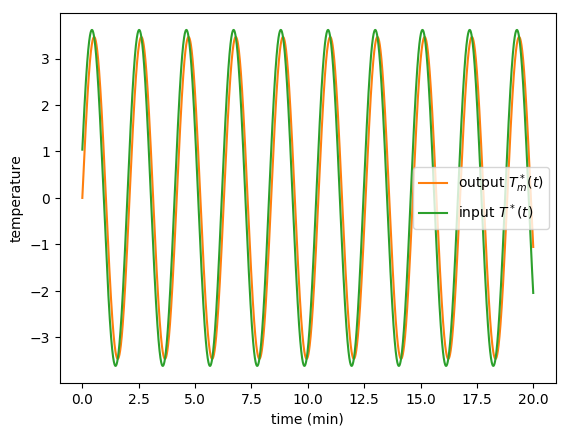

PyObject Text(0.5,24,'time (min)')

In [46]:
figure()
plot(t, Tm, color="C1", label="output \$T_m^*(t)\$")
plot(t, T, color="C2", label="input \$T^*(t)\$")
legend()
ylabel("temperature")
xlabel("time (min)")

Sometimes the measured temperature is less than the true temperature; sometimes the measured temperature is greater than the true temperature.

The input's amplitude is attenuated. This is always the case for first order systems when $K=1$.

We can get the maximum difference numerically, assuming the time domain is discretized finely enough:

In [47]:
maximum(abs.(T - Tm))

1.0392000000000003

So the maximum difference between the temperature measurement and the actual temperature is 1.039